# Analyze the LASSO results

- Inputs: LASSO coefficients from the 3 * 3 regressions.
- Analyzing the performance, key coefficients, etc.


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

# regression tools
import statsmodels.api as sm
from sklearn.preprocessing import normalize


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
with open('../../data/05_model_outputs/lasso_performance.pickle', 'rb') as f:
    performance_dic = pickle.load(f)
    
with open('../../data/05_model_outputs/lasso_coefficients.pickle', 'rb') as f:
    coeff_dic = pickle.load(f)
    

#### Obtain the key activities

In [3]:
# Export all the important activities
import itertools

city_list = ['total', 'boston', 'chicago', 'miami']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 
               'rent_median_2018']

### 
coeff_dic_for_df = {}

# pd.DataFrame(np.zeros((15, 3*3)), 
#                         columns = list(itertools.product(city_list, output_list)))

for city in city_list:
    for output in output_list:
        print(city, output)
        coeff_dic_for_df[(city, output)] = copy.copy(coeff_dic[city][output]['lasso (no socio-demographics)'])
        coeff_dic_for_df[(city, output)] = coeff_dic_for_df[(city, output)].reset_index()
        

total inc_median_household_2018
total property_value_median_2018
total rent_median_2018
boston inc_median_household_2018
boston property_value_median_2018
boston rent_median_2018
chicago inc_median_household_2018
chicago property_value_median_2018
chicago rent_median_2018
miami inc_median_household_2018
miami property_value_median_2018
miami rent_median_2018


In [4]:
pd.concat(coeff_dic_for_df, axis = 1)

total                                                 \
   inc_median_household_2018           property_value_median_2018             
                       index     value                      index     value   
0             Discount Store -0.218828             Discount Store -0.186072   
1          Convenience Store -0.051647                  Fast Food -0.133999   
2                 Laundromat -0.010929          Convenience Store -0.030605   
3                Yoga Studio  0.012139                Gas Station -0.027466   
4                 Steakhouse  0.014241                    Storage -0.023133   
5                     French  0.026959                       Food -0.005162   
6             Science Museum  0.027879                Yoga Studio  0.012612   
7                   Football  0.030819               Tennis Court  0.014832   
8                    Stadium  0.032739                  Gastropub  0.019853   
9                  Gastropub  0.037155                     Hockey  0.039777   
10              Toys & Games  0.039801                      Metro  0.061287   
11                 Wine Shop  0.057118               Cycle Studio  0.068886   
12                    Hockey  0.120425                  Wine Shop  0.089955   
13              Skating Rink  0.131012                     French  0.098934   
14              New American  0.139839               New American  0.150236   

                                                 boston            \
   rent_median_2018           inc_median_household_2018             
              index     value                     index     value   
0    Discount Store -0.170811            Latin American -0.052719   
1       Bus Station -0.025957                 Caribbean -0.047442   
2            Bistro  0.010115                 Brazilian -0.033213   
3         Wine Shop  0.012285             Fried Chicken -0.026100   
4         Synagogue  0.015172                Laundromat -0.020124   
5          Football  0.017733                Food Stand  0.022041   
6      Tech Startup  0.021204              Tennis Court  0.022838   
7      Cycle Studio  0.025971             Fishing Store  0.024188   
8             Salad  0.029249                  Football  0.024686   
9           Science  0.033876            Science Museum  0.027285   
10        Gastropub  0.046317                  Ski Area  0.028614   
11     Tennis Court  0.059231               Peking Duck  0.039055   
12           Bagels  0.071801                  Cupcakes  0.042785   
13           French  0.076832              Skating Rink  0.062328   
14     New American  0.093485                    French  0.077346   

                                         ...                    chicago  \
   property_value_median_2018            ... property_value_median_2018   
                        index     value  ...                      index   
0              Discount Store -0.045884  ...             Discount Store   
1           Convenience Store -0.042458  ...                       Food   
2                    Hot Dogs -0.032983  ...                  Pawn Shop   
3                  Car Washes -0.029239  ...                     Buffet   
4              Latin American -0.026444  ...                  Caribbean   
5                      Tattoo -0.024189  ...             Pilates Studio   
6                   Brazilian -0.022922  ...               Climbing Gym   
7                 Video Games -0.021531  ...               Tennis Court   
8                  Strip Club -0.021167  ...                Yoga Studio   
9                  Art Museum  0.023082  ...                    Gourmet   
10                  Locksmith  0.025664  ...                     Hockey   
11                     Bagels  0.028036  ...                     Kosher   
12               Cycle Studio  0.071260  ...                Curling Ice   
13                      Salad  0.083690  ...               New American   
14                     French  0.098779  ...                     French   

      

In [5]:
# Export all the important activities
import itertools

city_list = ['total', 'boston', 'chicago', 'miami']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 
               'rent_median_2018']

### 
coeff_dic_with_socio_for_df = {}

# pd.DataFrame(np.zeros((15, 3*3)), 
#                         columns = list(itertools.product(city_list, output_list)))

for city in city_list:
    for output in output_list:
        print(city, output)
        coeff_dic_with_socio_for_df[(city, output)] = copy.copy(coeff_dic[city][output]['lasso (with socio-demographics)'])
        coeff_dic_with_socio_for_df[(city, output)] = coeff_dic_with_socio_for_df[(city, output)].reset_index()
        

total inc_median_household_2018
total property_value_median_2018
total rent_median_2018
boston inc_median_household_2018
boston property_value_median_2018
boston rent_median_2018
chicago inc_median_household_2018
chicago property_value_median_2018
chicago rent_median_2018
miami inc_median_household_2018
miami property_value_median_2018
miami rent_median_2018


In [6]:
pd.concat(coeff_dic_with_socio_for_df, axis = 1)

total                                                 \
    inc_median_household_2018           property_value_median_2018             
                        index     value                      index     value   
0            pop_density_2016 -0.106199                  Fast Food -0.087544   
1                     Gay Bar -0.021656             Discount Store -0.042958   
2                       Beach -0.016163                    Tex-Mex -0.033133   
3                   Surf Spot -0.014342                       Soup -0.015401   
4                    Cupcakes  0.010626                        Zoo -0.013569   
5                  Food Stand  0.012550              Fried Chicken -0.009409   
6                 Peking Duck  0.013502                Curling Ice  0.009077   
7                Cycle Studio  0.013585                 Food Stand  0.016401   
8                Tennis Court  0.018673                  Wine Shop  0.018496   
9                      French  0.021939                 Taxi Stand  0.025884   
10                Sports Club  0.022010               Tennis Court  0.030051   
11               Soccer Field  0.033955               Cycle Studio  0.038318   
12               Skating Rink  0.034450                      Metro  0.045061   
13      race_white_ratio_2016  0.118424                     French  0.054911   
14  edu_higher_edu_ratio_2016  0.551729  edu_higher_edu_ratio_2016  0.568737   

                                                            boston            \
             rent_median_2018            inc_median_household_2018             
                        index     value                      index     value   
0                 Bus Station -0.031097           pop_density_2016 -0.114354   
1                     Gay Bar -0.020326                     Shrine -0.021081   
2                     Gourmet -0.012897                     Castle -0.018648   
3                    Antiques -0.012886                  Himalayan -0.016375   
4              Adult Boutique -0.012854              Fishing Store  0.015679   
5                 Other Event  0.012599                   Ski Area  0.016568   
6                       Metro  0.012808           Meze Restaurants  0.017375   
7                   Synagogue  0.012824                Sports Club  0.017825   
8                      French  0.013191                     Soccer  0.017893   
9                       Plane  0.013247                Peking Duck  0.018637   
10                 Kids Store  0.013921                   Cupcakes  0.031568   
11               Tennis Court  0.017061                 Food Stand  0.032439   
12                Golf Course  0.017657               Skating Rink  0.035528   
13                    Science  0.018160                     French  0.049460   
14  edu_higher_edu_ratio_2016  0.313416  edu_higher_edu_ratio_2016  0.498983   

                                         ...                    chicago  \
   property_value_median_2018            ... property_value_median_2018   
                        index     value  ...                      index   
0           Business Services -0.032764  ...                     Buffet   
1                     Tex-Mex -0.029262  ...                  Caribbean   
2              Animal Shelter -0.028918  ...               Credit Union   
3                 Video Games -0.027172  ...               Scandinavian   
4                  Strip Club -0.019325  ...                 Conference   
5                         Zoo -0.017598  ...                    Village   
6                 Sports Club  0.018568  ...                       Food   
7                    Wine Bar  0.019554  ...                 Bike Trail   
8                       Pitch  0.021053  ...             Latin American   
9                 Cheese Shop  0.021053  ...                      Cuban   
10                  Locksmith  0.026452  ...                     French   
11                      Salad  0.054586  ...                     Kosher   
12               

#### Top performances

In [7]:
import itertools

top_performance_dic = {}
city_list = ['total', 'boston', 'chicago', 'miami']
output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
perform_category_list = ['baseline', 'lasso (no socio-demographics)', 'lasso (with socio-demographics)']

for city in city_list:
    top_performance_dic[city] = {}
    for output in output_list:
        for perform_category in perform_category_list:
            if perform_category == 'baseline':
                top_performance_dic[city][(output, perform_category)] = performance_dic[city][output][perform_category]
                
            else:
                max_col = np.argmax(performance_dic[city][output][perform_category].loc['testing',:])
                top_performance_dic[city][(output, perform_category)] = performance_dic[city][output][perform_category].iloc[:, max_col]
            

In [8]:
pd.concat(top_performance_dic['total'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                          0.01   
training                        0.679                      0.651048   
testing                         0.665                      0.585146   
coef counts                     8.000                    138.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      1e-06                   baseline   
training                           0.750703                      0.515   
testing                            0.703291                      0.507   
coef counts                       28.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                     0.01                           1e-06   
training                         0.632463                        0.701025   
testing                          0.569607                        0.656472   
coef counts                    139.000000                       78.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                          0.01   
training               0.340                      0.479630   
testing                0.338                      0.311628   
coef counts            8.000                    173.000000   

                                             
            lasso (with socio-demographics)  
                                      1e-06  
training                           0.506599  
testing                            0.422089  
coef counts                       26.000000

In [96]:
pd.concat(top_performance_dic['boston'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         1e-05   
training                        0.657                      0.662944   
testing                         0.647                      0.511138   
coef counts                     8.000                     53.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      1e-05                   baseline   
training                           0.748768                      0.610   
testing                            0.673873                      0.542   
coef counts                       20.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    1e-05                           5e-06   
training                         0.736076                        0.832544   
testing                          0.548133                        0.632311   
coef counts                     57.000000                       76.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         2e-05   
training               0.383                      0.303447   
testing                0.272                      0.175208   
coef counts            8.000                     13.000000   

                                             
            lasso (with socio-demographics)  
                                      2e-05  
training                           0.372606  
testing                            0.280838  
coef counts                        5.000000

In [97]:
pd.concat(top_performance_dic['chicago'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         5e-06   
training                        0.716                      0.633444   
testing                         0.702                      0.545771   
coef counts                     8.000                     48.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      5e-06                   baseline   
training                           0.746204                      0.630   
testing                            0.710852                      0.621   
coef counts                       23.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    5e-06                           5e-06   
training                         0.620760                        0.710028   
testing                          0.529977                        0.672314   
coef counts                     63.000000                       30.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         2e-06   
training               0.417                      0.509962   
testing                0.435                      0.318822   
coef counts            8.000                     49.000000   

                                             
            lasso (with socio-demographics)  
                                      5e-06  
training                           0.465512  
testing                            0.443328  
coef counts                        8.000000

In [98]:
pd.concat(top_performance_dic['miami'], axis = 1)

inc_median_household_2018                                \
                             baseline lasso (no socio-demographics)   
                             baseline                         5e-06   
training                        0.660                      0.745158   
testing                         0.574                      0.421818   
coef counts                     8.000                     92.000000   

                                            property_value_median_2018  \
            lasso (with socio-demographics)                   baseline   
                                      5e-06                   baseline   
training                           0.803404                      0.497   
testing                            0.562708                      0.455   
coef counts                       50.000000                      8.000   

                                                                           \
            lasso (no socio-demographics) lasso (with socio-demographics)   
                                    1e-05                           1e-05   
training                         0.623109                        0.677154   
testing                          0.334825                        0.468405   
coef counts                     86.000000                       62.000000   

            rent_median_2018                                \
                    baseline lasso (no socio-demographics)   
                    baseline                         1e-05   
training               0.429                      0.514653   
testing                0.384                      0.277484   
coef counts            8.000                     36.000000   

                                             
            lasso (with socio-demographics)  
                                      1e-05  
training                           0.547211  
testing                            0.412846  
coef counts                       21.000000

# Visualization (Need to be revised)

In [3]:
def plot_multiple_lines_ax(names, x, x_label, d1, d2, d3, title):
    # overall style
    # x_label set up is still not ideal...
    plt.style.use('ggplot') # set the style; or "ggplot", "dark_background", "classic";
    fig = plt.figure(figsize = (15, 8))
    ax = plt.axes()
    ax2 = ax.twinx()

    ax.plot(x, d1, label = names[0])
    ax.plot(x, d2, label = names[1])
    ax.set_title(title)
    ax.set(xlabel = 'X', ylabel = "Y")
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15) # adjust all font size...
    ax.title.set_fontsize(20)
    
    ax.legend(loc = 2, fontsize = 20, title = None) # remove the legend title of "City_province"
    ax.set_xlabel("Alpha (regularization)")
    ax.set_ylabel("R2")
    
    ax2.bar(x, d3, alpha = 0.2)
    for c in ax2.containers:
        ax2.bar_label(c)

    ax2.set_ylabel("Coefficient Counts")
#     ax.set_xticks([2001, 2007, 2014]); 
    ax.set_xticklabels(x_label)    



In [5]:
performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)']


,0.000000,0.000001,0.000002,0.000005,0.000010,0.000020,0.000050,0.000100,0.001000,0.010000,0.100000,1.000000
training,0.975341,0.905218,0.860122,0.769129,0.662944,0.530343,0.332327,0.001392,0.000000,0.000000,0.000000,0.000000
testing,-4.848606,0.266182,0.416979,0.504432,0.511138,0.479532,0.344485,-0.001573,-0.002119,-0.002119,-0.002119,-0.002119
coef counts,540.000000,254.000000,174.000000,101.000000,53.000000,24.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].columns[3:])

[5e-06, 1e-05, 2e-05, 5e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


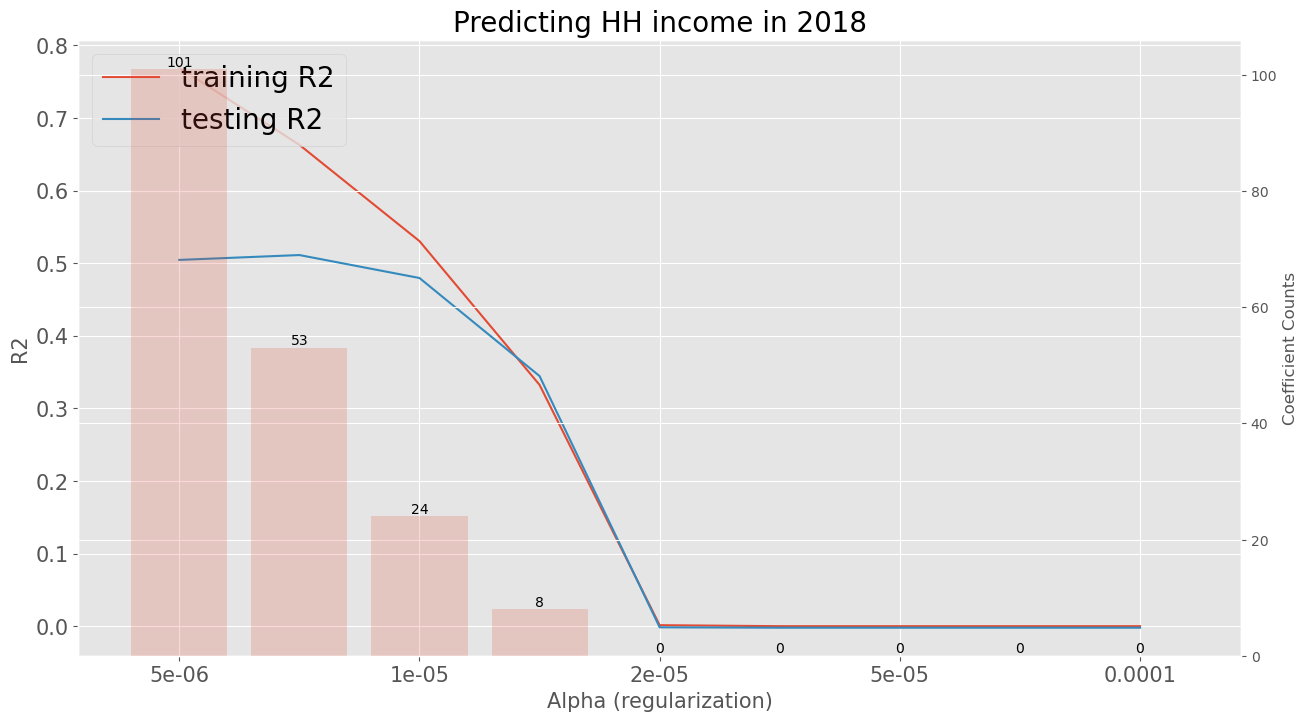

In [13]:
# income
x = np.arange(9)
x_label = list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].columns[2:-1])
Training = list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].iloc[0, 3:])
Testing = list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].iloc[1, 3:])
Counts = list(performance_dic['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].iloc[2, 3:])
names = ['training R2', 'testing R2']
title = "Predicting HH income in 2018"
plot_multiple_lines_ax(names, x, x_label, Training, Testing, Counts, title)
plt.show()


In [42]:
performance_dic['property_value_median_2018']['lasso (no socio-demographics)']

,1.0,5.0,10.0,20.0,50.0,100.0,200.0,500.0,1000.0
training,0.978588,0.961178,0.941987,0.910838,0.851823,0.789799,0.711320,0.555085,0.360838
testing,-2.211983,-0.393351,0.063695,0.329875,0.504333,0.539329,0.545733,0.473817,0.304878
coef counts,608.000000,550.000000,490.000000,398.000000,281.000000,184.000000,116.000000,44.000000,11.000000


/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


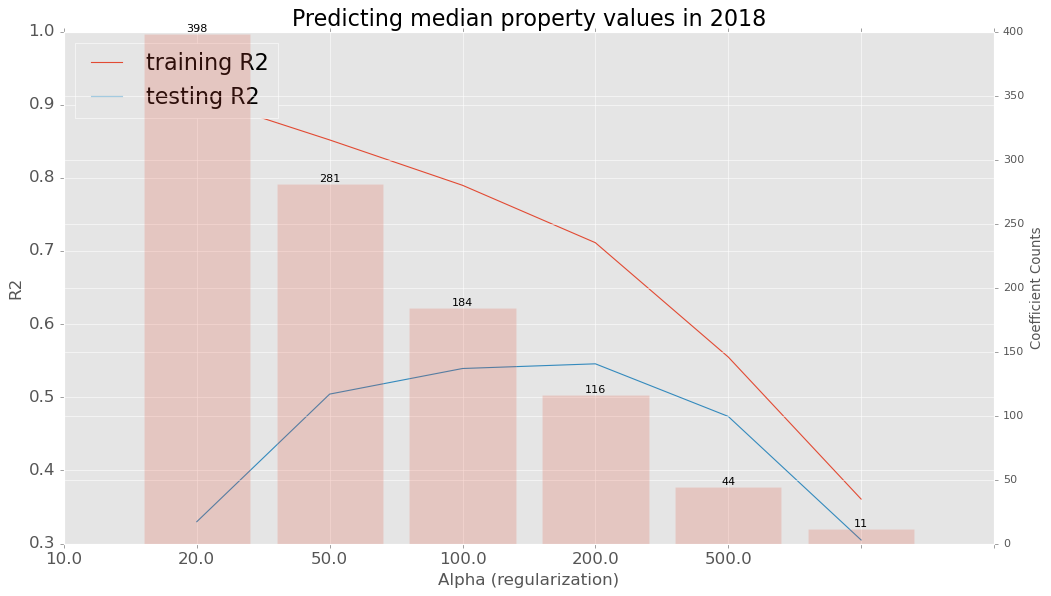

In [57]:
# property value
x = np.arange(6)
x_label = list(performance_dic['property_value_median_2018']['lasso (no socio-demographics)'].columns[2:-1])
Training = list(performance_dic['property_value_median_2018']['lasso (no socio-demographics)'].iloc[0, 3:])
Testing = list(performance_dic['property_value_median_2018']['lasso (no socio-demographics)'].iloc[1, 3:])
Counts = list(performance_dic['property_value_median_2018']['lasso (no socio-demographics)'].iloc[2, 3:])
names = ['training R2', 'testing R2']
title = "Predicting median property values in 2018"
plot_multiple_lines_ax(names, x, x_label, Training, Testing, Counts, title)
plt.show()

In [6]:
performance_dic['inc_per_capita_2018']['lasso (with socio-demographics)']

,0.01,0.10,1.00,5.00,10.00,20.00,50.00,100.00,200.00
training,0.989835,0.986639,0.957410,0.876988,0.816717,0.736499,0.626045,0.498500,0.207338
testing,-4.176889,-1.214749,0.389242,0.646585,0.624241,0.558416,0.495585,0.412272,0.189016
coef counts,639.000000,618.000000,466.000000,235.000000,129.000000,62.000000,12.000000,4.000000,1.000000


/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


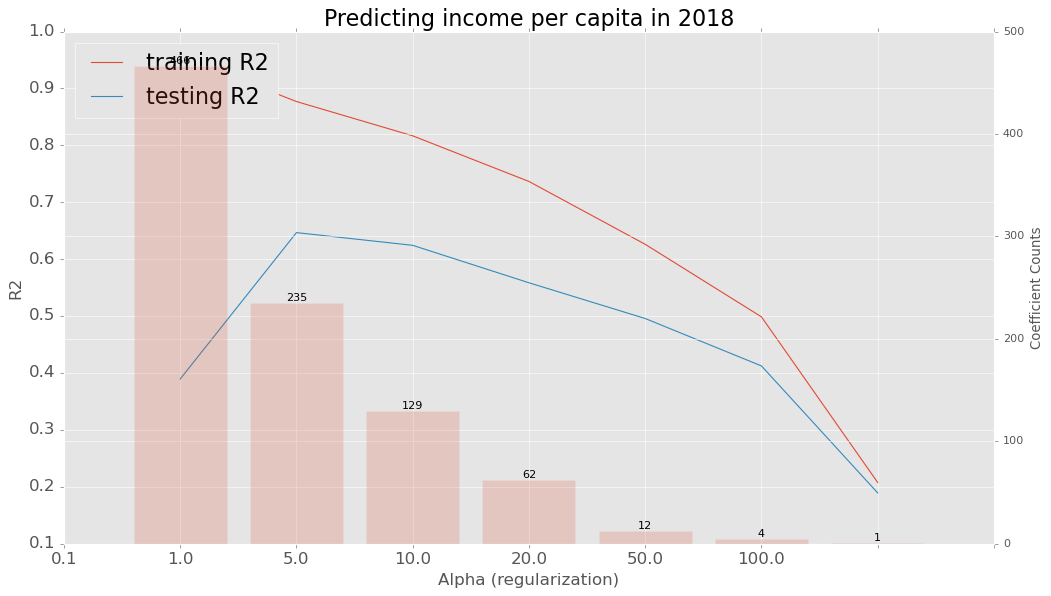

In [58]:
# income
x = np.arange(7)
x_label = list(performance_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].columns[1:-1])
Training = list(performance_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].iloc[0, 2:])
Testing = list(performance_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].iloc[1, 2:])
Counts = list(performance_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].iloc[2, 2:])
names = ['training R2', 'testing R2']
title = "Predicting income per capita in 2018"
plot_multiple_lines_ax(names, x, x_label, Training, Testing, Counts, title)
plt.show()


In [59]:
performance_dic['property_value_median_2018']['lasso (with socio-demographics)']

,1.0,5.0,10.0,20.0,50.0,100.0,200.0,500.0,1000.0
training,0.984110,0.969421,0.952739,0.924953,0.870767,0.816611,0.753369,0.638447,0.522712
testing,-1.377806,-0.138991,0.230830,0.477488,0.598295,0.614348,0.621981,0.573042,0.475669
coef counts,613.000000,538.000000,474.000000,391.000000,270.000000,155.000000,86.000000,20.000000,3.000000


/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


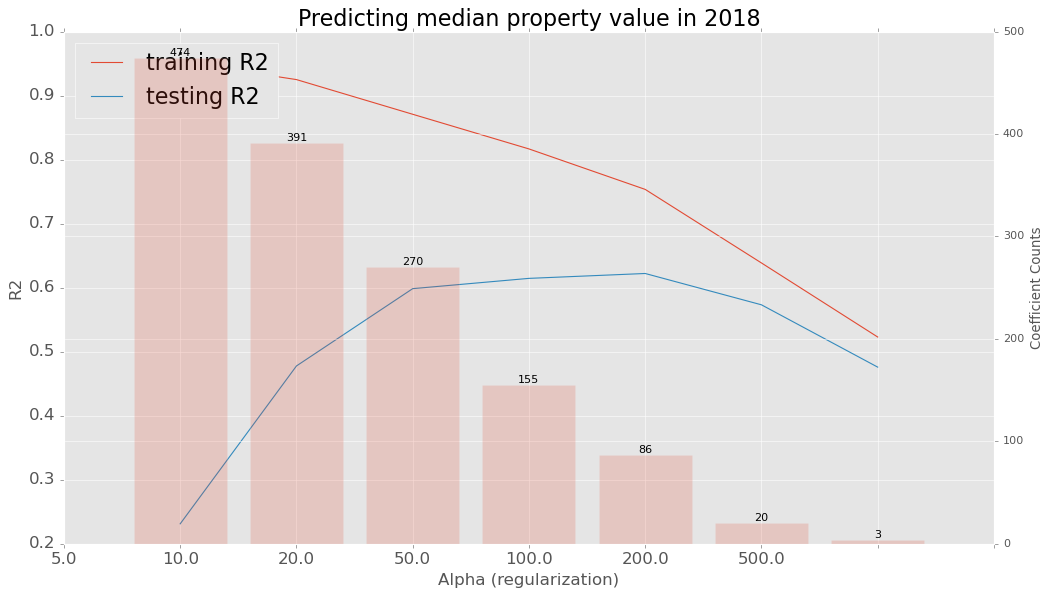

In [60]:
# income
x = np.arange(7)
x_label = list(performance_dic['property_value_median_2018']['lasso (with socio-demographics)'].columns[1:-1])
Training = list(performance_dic['property_value_median_2018']['lasso (with socio-demographics)'].iloc[0, 2:])
Testing = list(performance_dic['property_value_median_2018']['lasso (with socio-demographics)'].iloc[1, 2:])
Counts = list(performance_dic['property_value_median_2018']['lasso (with socio-demographics)'].iloc[2, 2:])
names = ['training R2', 'testing R2']
title = "Predicting median property value in 2018"
plot_multiple_lines_ax(names, x, x_label, Training, Testing, Counts, title)
plt.show()

In [63]:
coeff_dic['inc_per_capita_2018']['lasso (no socio-demographics)'].sort_values('value')


,value
Caribbean,-130577.432568
Latin American,-65173.540096
Spanish,-27016.670690
Auto Garage,-20241.979405
Fried Chicken,-8193.853183
Poutine Place,-2321.392442
Fishing Store,1224.329255
Meze Restaurants,1240.528961
Food Stand,10698.208772
Watch Shops,13787.370059


In [64]:
coeff_dic['property_value_median_2018']['lasso (no socio-demographics)'].sort_values('value')


,value
Tattoo,-4.484756e+05
Discount Store,-4.422821e+05
Caribbean,-2.924503e+05
Auto Garage,-6.687945e+04
Cantonese,-7.510371e+03
Synagogue,3.554874e+04
Climbing Gym,9.526603e+04
Art Museum,2.971592e+05
Cycle Studio,3.212110e+05
Salad,5.954154e+05


In [66]:
coeff_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].sort_values('value')


,value
Caribbean,-3.237962e+04
Poutine Place,-2.962956e+03
Spanish,-2.281308e+03
edu_master_ratio_2016,8.195944e-11
Watch Shops,6.482120e+03
Boat / Ferry,8.677798e+03
Juice Bar,9.848714e+03
Food Stand,1.300285e+04
Drugstore,2.479056e+04
Cycle Studio,5.326557e+04


In [67]:
coeff_dic['property_value_median_2018']['lasso (with socio-demographics)'].sort_values('value')


,value
Credit Union,-1.808262e+05
Tattoo,-1.415982e+05
Supplement Shop,-1.410853e+05
Stationery Store,-1.146904e+05
Leather Goods,4.969406e+03
Line / Queue,7.202782e+04
Synagogue,1.152545e+05
Juice Bar,1.913734e+05
Salad,1.972374e+05
pop_density_2016,2.525042e+05


In [74]:
set1 = set(coeff_dic['inc_per_capita_2018']['lasso (no socio-demographics)'].index).union(set(coeff_dic['property_value_median_2018']['lasso (no socio-demographics)'].index))
set2 = set(coeff_dic['inc_per_capita_2018']['lasso (with socio-demographics)'].index).union(set(coeff_dic['property_value_median_2018']['lasso (with socio-demographics)'].index))
full_set = set1.union(set2)
full_set

{'Art Museum',
 'Auto Garage',
 'Boat / Ferry',
 'Cantonese',
 'Caribbean',
 'Climbing Gym',
 'Credit Union',
 'Cycle Studio',
 'Discount Store',
 'Drugstore',
 'Fishing Store',
 'Food Stand',
 'French',
 'Fried Chicken',
 'Juice Bar',
 'Latin American',
 'Leather Goods',
 'Line / Queue',
 'Meze Restaurants',
 'New American',
 'Peking Duck',
 'Poutine Place',
 'Salad',
 'Spanish',
 'Stationery Store',
 'Supplement Shop',
 'Synagogue',
 'Tapas',
 'Tattoo',
 'Watch Shops',
 'edu_bachelor_ratio_2016',
 'edu_master_ratio_2016',
 'pop_density_2016'}

In [71]:
set(coeff_dic['property_value_median_2018']['lasso (no socio-demographics)'])


{'value'}